#**Pattern Recognition and Machine Learning 2022 Winter Semester**

##**Lab - 2 Assignment**

###Name: Dev Goel
###Roll No: B20CS090

##Importing the Necessary Python Libraries and Components

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error as mse
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score as cvs
import seaborn as sns

##Question-1

###**0.** Input the dataset

In [2]:
# Input the dataset.
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-2/penguins.csv")
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
 7   year               344 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 21.6+ KB


###**1.** Perform pre-processing and visualization of the dataset. Perform categorical encoding wherever applicable and split the data into train and test sets

In [4]:
# Checking for Null Values
data.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [5]:
# Performing Pre-Processing in the data.
""" Handling NaN/Missing values in the given dataset """
data.dropna(inplace = True)
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [6]:
print(data.isnull().sum())
print() # Blank Line
data.info()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
 7   year               333 non-null    int64  
dtypes: float64(4), int64(1), object(3)
memory usage: 23.4+ KB


Visualizing the Dataset

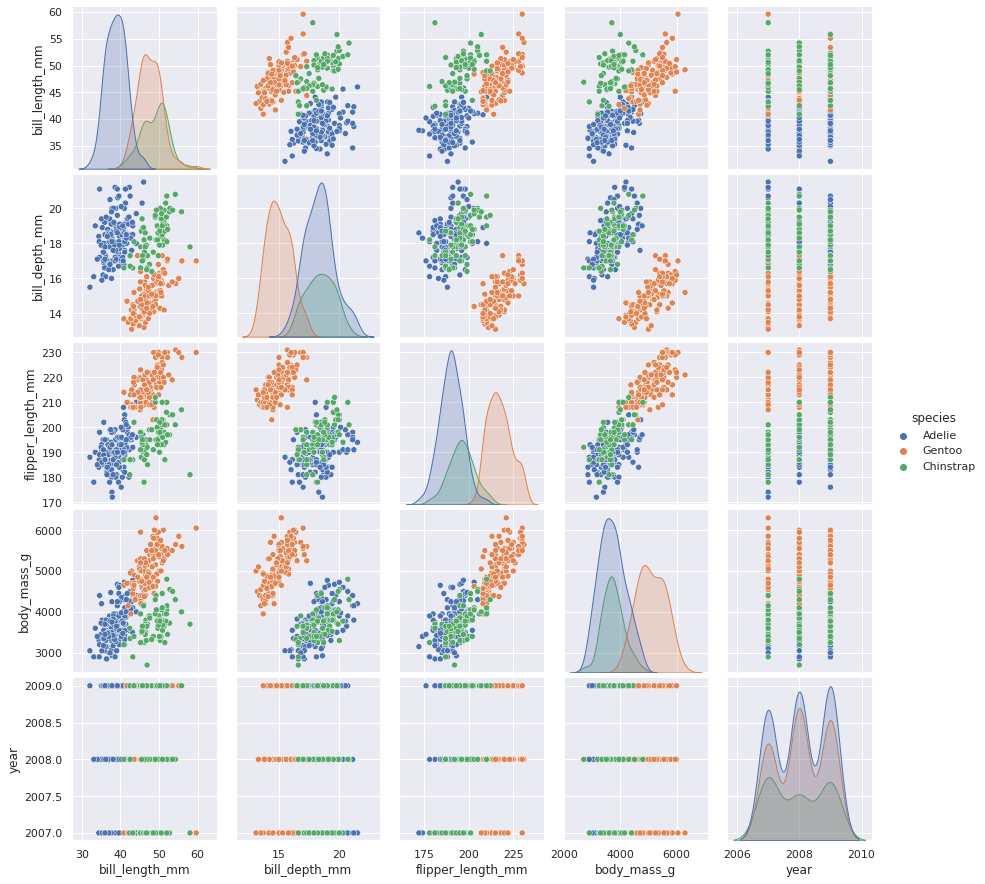

In [7]:
sns.set()
sns.pairplot(data, hue='species', height=2.5);

In [8]:
# Performing categorical encoding wherever applicable in the data

# Storing categorical data in a list.
categoricalData = []
for i in data.columns:
    if data[i].dtype == 'object':
        categoricalData.append(i)
categoricalData.append("year")
# Though dtype of year is not object but as it can be categorized. So, 
# I have appended it in the list of categoricalData

Label_Encode = LabelEncoder()

for i in categoricalData:
    y = data[i]
    transform = Label_Encode.fit_transform(y)
    data[i] = transform

data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,0
1,0,2,39.5,17.4,186.0,3800.0,0,0
2,0,2,40.3,18.0,195.0,3250.0,0,0
4,0,2,36.7,19.3,193.0,3450.0,0,0
5,0,2,39.3,20.6,190.0,3650.0,1,0
...,...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,1,2
340,1,1,43.5,18.1,202.0,3400.0,0,2
341,1,1,49.6,18.2,193.0,3775.0,1,2
342,1,1,50.8,19.0,210.0,4100.0,1,2


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 333 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    int64  
 1   island             333 non-null    int64  
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    int64  
 7   year               333 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 33.4 KB


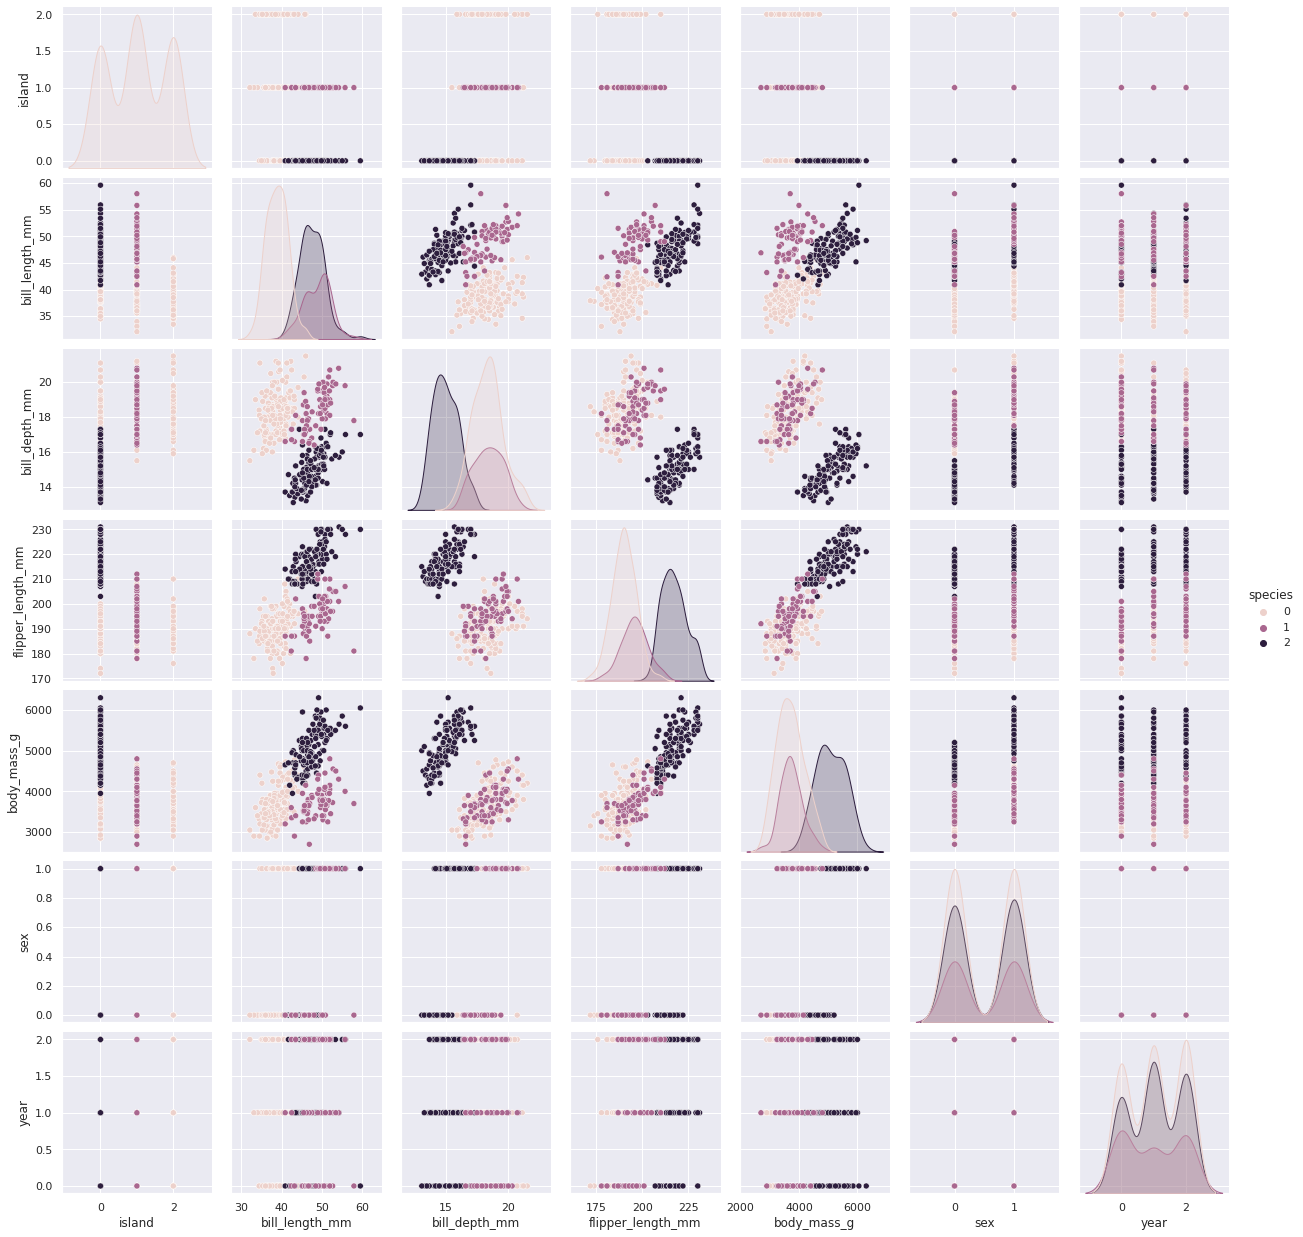

In [10]:
sns.set()
sns.pairplot(data, hue='species', height=2.5);

In [11]:
# Splitting the data into train and test sets.

# Target attribute
Y = data.iloc[:,0]                                
X = data
x_train, x_test, y_train, y_test = tts(X, Y, test_size=0.2, random_state=2000)

###**2.** Implement the cost function as per your roll num

In [12]:
# My Roll No: B20CS090
# Even roll numbers :- entropy

# ----------- Something about Entropy -----------
"""
# A completely homogeneous sample has entropy of 0
# An equally divided sample has entropy of 1
"""

# --------------- Entropy - Formulae ---------------
"""
For examples belonging to classes c1 to cn
– Where pn is the proportion of examples in cn
Entropy(S) = from i = 1 to i = n {Summation of -pi*log2(pi)}
"""

def entropy(y):
    # Counting the number of occurrences of each value in array of non-negative ints.
    occurance = np.bincount(y)
    # Since we have to deal with proportion.
    P = occurance / len(y)
    # Calculating the entropy
    entropy = -np.sum([p * np.log2(p) for p in P if p > 0])
    return entropy

# Parent Entropy
entropy(data["species"])

1.5200835543530913

###**3.** In order for the decision tree to work successfully, continuous variables need to be converted to categorical variables first. To do this, you need to implement a decision function that makes this split. Let us call that cont_to_cat(). The details of the function are the following.

####**a.)** Assume that the continuous variables are independent of each other i.e. assuming 2 continuous variables A and B, the split of A does not in any way affect the split you will perform in B.
####**b.)** The continuous variables should only be split into 2 categories, and the optimal split is one that divides the samples the best, based on the value of the function you have been allotted (as per your roll number).

In [13]:
# Storing all the continuous variables in the dataset. (Since we have to convert the columns that contains continuous data to categorical data)
continuousVariable = []
for i in data.columns:
    if(data[i].dtype == 'float64'):
        continuousVariable.append(i)
print(continuousVariable)

['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']


In [14]:
# Implementing the function to calculate the information gain of particular attribute.
def information_gain(dataset, S, Attribute):
    # Overall Entropy of S.
    # First the entropy of the total dataset is calculated
    len_of_dataset = len(dataset[S])
    informationGain = entropy(dataset[S])
    for values in dataset[Attribute].unique():
        # The dataset is then split on different attributes
        subset_of_dataset = dataset[dataset[Attribute] == values]
        # Using the formula of informationGain as discussed in slides.
        informationGain = informationGain - len(subset_of_dataset[S])*entropy(subset_of_dataset[S])/len_of_dataset
    return informationGain

information_gain(x_train, "species", "island")

0.7647107230949135

In [15]:
def split_into_two_categories(dataset, column, threshold):
    # Iterating in each column
    for i in dataset[column]:
        # if value is less than threshold replace it by 0 else replace it by 1.
        if i < threshold:
            dataset[column] = dataset[column].replace(i, '0')
        else:
            dataset[column] = dataset[column].replace(i, '1')
    return dataset
data

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,0,2,39.1,18.7,181.0,3750.0,1,0
1,0,2,39.5,17.4,186.0,3800.0,0,0
2,0,2,40.3,18.0,195.0,3250.0,0,0
4,0,2,36.7,19.3,193.0,3450.0,0,0
5,0,2,39.3,20.6,190.0,3650.0,1,0
...,...,...,...,...,...,...,...,...
339,1,1,55.8,19.8,207.0,4000.0,1,2
340,1,1,43.5,18.1,202.0,3400.0,0,2
341,1,1,49.6,18.2,193.0,3775.0,1,2
342,1,1,50.8,19.0,210.0,4100.0,1,2


In [16]:
# Storing the best possible splits threshold of each column.
# Since it will help to convert the x_test data into desired format.
storeBestSplitThresholds = {}

def cont_to_cat(dataset, target, column):
    # Initialized best_info_gain to -1 and best_split_threshold to -1 as well.
    best_info_gain = -1
    best_split_threshold = -1
    # Iterating over column for each unique value calculating the info_gain and simulatenously updating the best_info_gain.
    for value in dataset[column].unique():
        temp = dataset.copy()
        temp = split_into_two_categories(temp, column, value)
        info_gain = information_gain(temp, target, column)
        # IF info gain is more than best info gain we update best info gain also update the threshold value.
        if(info_gain > best_info_gain):
            best_info_gain = info_gain
            best_split_threshold = value

    storeBestSplitThresholds[column] = best_split_threshold
    dataframe = split_into_two_categories(dataset, column, best_split_threshold)
    print(column, best_split_threshold, best_info_gain)        

# Converting each continuous variable to categorical data.
for i in continuousVariable:
    cont_to_cat(x_train, "species", i)

bill_length_mm 42.4 0.6926710398062347
bill_depth_mm 16.4 0.6866380159237133
flipper_length_mm 207.0 0.8249716516437954
body_mass_g 4575.0 0.58714067179174


In [17]:
print(storeBestSplitThresholds)

{'bill_length_mm': 42.4, 'bill_depth_mm': 16.4, 'flipper_length_mm': 207.0, 'body_mass_g': 4575.0}


In [18]:
x_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
70,0,2,0,1,0,0,0,1
162,2,0,0,0,1,1,0,0
114,0,0,0,1,0,0,0,2
316,1,1,1,1,1,0,1,1
239,2,0,1,0,1,1,1,2
...,...,...,...,...,...,...,...,...
295,1,1,1,1,0,0,1,0
129,0,2,1,1,1,0,1,2
60,0,0,0,1,0,0,0,1
213,2,0,1,0,1,1,1,1


###**4.** After step 2, all the attributes would have categorical values, so now you can go ahead and implement the training function. This would include implementing the following helper functions:
####**a.** Get the attribute that leads to the best split
####**b.** Make that split
####**c.** Repeat these steps for the newly-created split

--

### **5.** The DT should also include the following properties in the train function
####**a.** There should be a max depth that should be defined i.e. a depth after which the tree shouldn’t be allowed to grow
####**b.** The algorithm should self-identify when there is no information gain being done, i.e. the model has plateaued in it’s training and shouldn’t grow further.

#### **====>** *4th and 5th Implemented Together*

In [19]:
def best_attribute(dataset, target):
    # Initialized the best info gain to -1 and best attribute to None
    best_info_gain = -1
    best_attribute = None
    # Iterating over each columns in dataset and calculating the information gain for each attribute.
    # The attribute that yields the largest IG is chosen for the decision node.
    for columns in dataset.columns:
        if columns != target:
            info_gain = information_gain(dataset, target, columns)
            if(info_gain > best_info_gain):
                best_info_gain = info_gain
                best_attribute = columns
    return best_attribute, best_info_gain

print(best_attribute(x_train, "species"))

('flipper_length_mm', 0.8249716516437954)


In [20]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 70 to 339
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            266 non-null    int64 
 1   island             266 non-null    int64 
 2   bill_length_mm     266 non-null    object
 3   bill_depth_mm      266 non-null    object
 4   flipper_length_mm  266 non-null    object
 5   body_mass_g        266 non-null    object
 6   sex                266 non-null    int64 
 7   year               266 non-null    int64 
dtypes: int64(4), object(4)
memory usage: 18.7+ KB


In [21]:
for i in continuousVariable:
    x_train = x_train.astype({i:'int'})

In [22]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266 entries, 70 to 339
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   species            266 non-null    int64
 1   island             266 non-null    int64
 2   bill_length_mm     266 non-null    int64
 3   bill_depth_mm      266 non-null    int64
 4   flipper_length_mm  266 non-null    int64
 5   body_mass_g        266 non-null    int64
 6   sex                266 non-null    int64
 7   year               266 non-null    int64
dtypes: int64(8)
memory usage: 18.7 KB


In [23]:
def make_that_split(dataset, attribute):
    # Storing 0s in left.
    left = dataset[dataset[attribute]==0]
    # Storing 1s in right.
    right = dataset[dataset[attribute]==1]    
    # Storing 2s in mid. (Only if the attributed is distributed into three categories)
    mid = dataset[dataset[attribute]==2]
    return left, right, mid

In [24]:
x_train

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
70,0,2,0,1,0,0,0,1
162,2,0,0,0,1,1,0,0
114,0,0,0,1,0,0,0,2
316,1,1,1,1,1,0,1,1
239,2,0,1,0,1,1,1,2
...,...,...,...,...,...,...,...,...
295,1,1,1,1,0,0,1,0
129,0,2,1,1,1,0,1,2
60,0,0,0,1,0,0,0,1
213,2,0,1,0,1,1,1,1


In [25]:
def create_dict(column):
    # Initializing the dictionary to store the class frequency count.
    store_class_freq_count = {}
    # Unique values in column.
    classes = list(set(column))
    for i in range(len(classes)):
        store_class_freq_count[classes[i]] = 0
    for i in column:
        store_class_freq_count[i] += 1;
    return store_class_freq_count    

Leaf Node Class

In [26]:
class Leaf:
    def __init__(self, target, dataset):
        self.predictions = create_dict(dataset[target])

Decision Node Class

In [27]:
class Decision_Node:
    def __init__(self, Name = None, Left = None, Right = None, Mid = None):
        self.Name = Name
        self.Left = Left
        self.Right = Right
        self.Mid = Mid

In [28]:
def build_tree(dataset, target, depth):
    attribute, info_gain = best_attribute(dataset, target)
    left, right, mid = make_that_split(dataset, attribute)

    # --------------------------------------------- (PART OF QUESTION OF 5) ---------------------------------------------
    # There should be a max depth that should be defined i.e. a depth after which the tree shouldn’t be allowed to grow
    # The algorithm should self-identify when there is no information gain being done, i.e. the model has plateaued in it’s training and shouldn’t grow further.
    max_depth = 3
    if(entropy(dataset[target]) == 0 or depth >= max_depth):
        leaf = Leaf(target, dataset)
        return leaf

    # If the attribute is categorized into three categories.
    if(len(mid) != 0):
        T_left = build_tree(left, target, depth+1)
        T_right = build_tree(right, target, depth+1)
        T_mid = build_tree(mid, target, depth+1)
        Node = Decision_Node(attribute, T_left, T_right)
        return Node

    # If the attribute is categorized into two categories.
    else:
        mid = mid.drop(attribute, axis = 1)
        T_left = build_tree(left, target, depth+1)
        T_right = build_tree(right, target, depth+1)
        Node = Decision_Node(attribute, T_left,T_right)
        return Node

Tree = build_tree(x_train, "species", 0)

In [29]:
def print_tree(node, spacing=""):
    
    if isinstance(node, Leaf):
        print(spacing + "Predict", node.predictions)
        return
    # If the attribute is categorized into three categories.
    if(node.Mid != None):
        print(spacing + str(node.Name))
        print(spacing + '---> Left:')
        print_tree(node.Left, spacing + "   ")
        print(spacing + '---> Mid:')
        print_tree(node.Mid, spacing + "   ")
        print(spacing + '---> Right:')
        print_tree(node.Right, spacing + "   ")
    # If the attribute is categorized into two categories.
    else:
        print(spacing + str(node.Name))
        print(spacing + '---> Left:')
        print_tree(node.Left, spacing + "   ")
        print(spacing + '---> Right:')
        print_tree(node.Right, spacing + "   ")

In [30]:
print_tree(Tree)

flipper_length_mm
---> Left:
   bill_length_mm
   ---> Left:
      year
      ---> Left:
         Predict {0: 31}
      ---> Right:
         Predict {0: 38, 1: 1}
   ---> Right:
      island
      ---> Left:
         Predict {0: 3}
      ---> Right:
         Predict {0: 1, 1: 51}
---> Right:
   island
   ---> Left:
      Predict {2: 95}
   ---> Right:
      bill_length_mm
      ---> Left:
         Predict {0: 1}
      ---> Right:
         Predict {1: 4}


###**6.** Write a function which is responsible for classification (i.e. at test time).

In [31]:
X_test = x_test.copy()
for key in storeBestSplitThresholds:
    X_test = split_into_two_categories(X_test, key, storeBestSplitThresholds[key])
X_test.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
65,0,0,0,1,0,0,1,1
157,2,0,1,0,1,0,0,0
64,0,0,0,1,0,0,0,1
101,0,0,0,1,0,1,1,2
227,2,0,1,0,1,1,1,1


In [32]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 65 to 250
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            67 non-null     int64 
 1   island             67 non-null     int64 
 2   bill_length_mm     67 non-null     object
 3   bill_depth_mm      67 non-null     object
 4   flipper_length_mm  67 non-null     object
 5   body_mass_g        67 non-null     object
 6   sex                67 non-null     int64 
 7   year               67 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 4.7+ KB


In [33]:
for i in continuousVariable:
    X_test = X_test.astype({i:'int'})

In [34]:
X_test

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
65,0,0,0,1,0,0,1,1
157,2,0,1,0,1,0,0,0
64,0,0,0,1,0,0,0,1
101,0,0,0,1,0,1,1,2
227,2,0,1,0,1,1,1,1
...,...,...,...,...,...,...,...,...
120,0,2,0,1,0,0,0,2
137,0,1,0,1,0,0,1,2
146,0,1,0,1,0,0,1,2
301,1,1,1,1,0,0,1,0


In [35]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 67 entries, 65 to 250
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   species            67 non-null     int64
 1   island             67 non-null     int64
 2   bill_length_mm     67 non-null     int64
 3   bill_depth_mm      67 non-null     int64
 4   flipper_length_mm  67 non-null     int64
 5   body_mass_g        67 non-null     int64
 6   sex                67 non-null     int64
 7   year               67 non-null     int64
dtypes: int64(8)
memory usage: 4.7 KB


In [36]:
# Creating a list to store all the predicitons.
predictionsList = []

def majority(prediction):
    values = list(prediction.values())
    keys = list(prediction.keys())
    return keys[values.index(max(values))]

def classify(dataset, targetcolumn, node):
    # If it is a leaf node
    if isinstance(node, Leaf):
        # append the predictions in the Predictions list.
        predictionsList.append(majority(node.predictions))

    # else if it is a decision node we will classify it.
    if isinstance(node, Decision_Node):
        # Checking for attributes that are classified into three categories
        if(node.Mid == None):
            if dataset[node.Name] == 1:
                classify(dataset, targetcolumn, node.Right)
            else:
                classify(dataset, targetcolumn, node.Left)
        # Checking for attributes that are classified into two categories
        else:
            if dataset[node.Name] == 1:
                classify(dataset, targetcolumn, node.Right)
            elif dataset[node.Name] == 0:
                classify(dataset, targetcolumn, node.Left)
            else:
                classify(dataset, targetcolumn, node.Mid)

index = X_test.index.tolist()
for i in range(len(index)):
    classify(X_test.loc[index[i]], "species", Tree)

###**7.** Find out the accuracy you get on the test data

In [37]:
from sklearn.metrics import accuracy_score as acc
accuracy = acc(y_test, predictionsList)
print("accuracy:",accuracy*100, "%")

accuracy: 97.01492537313433 %


##Question-2

###**1.** Preprocess the data. Split it using a 70:10:20 ratio, which represents training:validation:testing.

In [38]:
datasetques2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/DataSet/LAB-2/ENB2012_data.xlsx - Φύλλο1.csv")
datasetques2

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In [39]:
# Performing Pre-Processing in the data.
# ==> Handling NaN values
datasetques2.dropna(inplace = True)
datasetques2

,X1,X2,X3,X4,X5,X6,X7,X8,Y1
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84
...,...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5,17.88
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5,16.54
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5,16.44
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5,16.48


In [40]:
target = "Y1"
X = datasetques2.iloc[:,datasetques2.columns != target]
Y = datasetques2.iloc[:,datasetques2.columns.get_loc(target)]
train_ratio = 0.70
validation_ratio = 0.10
test_ratio = 0.20
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size= 1- train_ratio, random_state = 2000)
X_val, X_test, Y_val, Y_test = tts(X_test, Y_test, test_size= test_ratio/(test_ratio+validation_ratio), random_state = 2000)
print("Training Data: ")
print(X_train)
print("Validation Data: ")
print(X_val)
print("Testing Data: ")
print(X_test)

Training Data: 
       X1     X2     X3     X4   X5  X6    X7  X8
93   0.62  808.5  367.5  220.5  3.5   3  0.10   1
538  0.86  588.0  294.0  147.0  7.0   4  0.40   1
148  0.90  563.5  318.5  122.5  7.0   2  0.10   3
19   0.79  637.0  343.0  147.0  7.0   5  0.00   0
389  0.90  563.5  318.5  122.5  7.0   3  0.25   3
..    ...    ...    ...    ...  ...  ..   ...  ..
412  0.71  710.5  269.5  220.5  3.5   2  0.25   3
284  0.62  808.5  367.5  220.5  3.5   2  0.10   5
635  0.86  588.0  294.0  147.0  7.0   5  0.40   3
566  0.66  759.5  318.5  220.5  3.5   4  0.40   1
206  0.82  612.5  318.5  147.0  7.0   4  0.10   4

[537 rows x 8 columns]
Validation Data: 
       X1     X2     X3      X4   X5  X6    X7  X8
270  0.71  710.5  269.5  220.50  3.5   4  0.10   5
626  0.98  514.5  294.0  110.25  7.0   4  0.40   3
612  0.66  759.5  318.5  220.50  3.5   2  0.40   2
263  0.76  661.5  416.5  122.50  7.0   5  0.10   5
421  0.66  759.5  318.5  220.50  3.5   3  0.25   3
..    ...    ...    ...     ...  ...

###**2.** Write a function to train the data using a regression decision tree. The function varies hyper-parameters to find the tree that generalizes best (based on its performance on the validation set). So, you need to train on the 70% training data and check performance on the 10% validation data.

####Randomly initializing the hyper-parameters for the inbuilt decision tree regressor

In [41]:
Regression_Tree = DecisionTreeRegressor(max_depth = 2)
Regression_Tree.fit(X_train, Y_train)
Predictions = Regression_Tree.predict(X_val)
mse(Y_val, Predictions)

8.614234548731417

####Varying Different Hyper-Parameters to get best value for each hyper-parameter

#####**1.** max_depth

Minimum MSE is:0.29810420555795697 when max_depth is: 7
[17.98328578099141, 8.614234548731417, 4.489927328811316, 1.9667829417438643, 0.7417568401402496, 0.380879487931367, 0.29810420555795697, 0.39219199437381036, 0.40478993172151395, 0.3875018979076478, 0.36520064935064933, 0.3654896103896104, 0.38005974025974026, 0.36652727272727265, 0.3688844155844155, 0.3823155844155844, 0.36447402597402595, 0.382112987012987, 0.38244025974025975, 0.36652727272727265, 0.38449350649350644, 0.3823155844155844, 0.366651948051948, 0.366651948051948, 0.3822376623376623, 0.366651948051948, 0.364325974025974, 0.364325974025974, 0.3846181818181818, 0.3800831168831169, 0.36447402597402595, 0.36445064935064936, 0.36652727272727265, 0.36683116883116884, 0.3800831168831169, 0.382112987012987, 0.36652727272727265, 0.38447012987012985, 0.37995844155844155, 0.38244025974025975, 0.3650454545454545, 0.366503896103896, 0.3800831168831169, 0.36652727272727265, 0.3800831168831169, 0.3667064935064935, 0.38231558441558

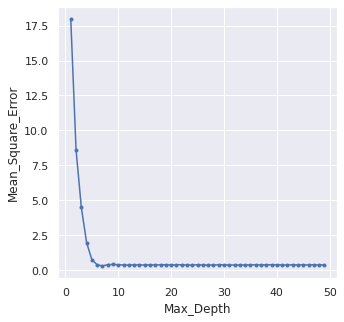

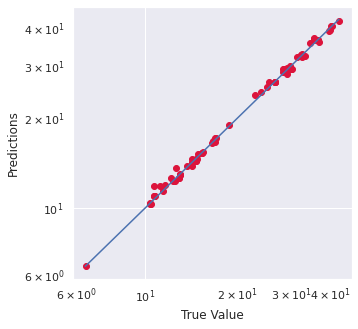

In [42]:
MaximumDepthList = []
MSE = []
for i in range(1, 50):
    MaximumDepthList.append(i)
    Regression_Tree = DecisionTreeRegressor(max_depth=i)
    Regression_Tree.fit(X_train, Y_train)
    Predictions = Regression_Tree.predict(X_val)
    Mse = mse(Y_val, Predictions)
    MSE.append(Mse)

print(f"Minimum MSE is:{min(MSE)} when max_depth is: {MSE.index(min(MSE))+1}")
print(MSE)
best_max_depth = MSE.index(min(MSE))+1
plt.figure(figsize=(5,5))
plt.plot(MaximumDepthList, MSE, marker = ".")
plt.xlabel("Max_Depth")
plt.ylabel("Mean_Square_Error")

Regression_Tree = DecisionTreeRegressor(max_depth=MSE.index(min(MSE))+1)
Regression_Tree.fit(X_train, Y_train)
Predictions = Regression_Tree.predict(X_val)
plt.figure(figsize=(5,5))
plt.scatter(Y_val, Predictions, c = 'crimson')
plt.yscale('log')
plt.xscale('log')
pmax = max(max(Predictions),max(Y_val))
pmin = min(min(Predictions),min(Y_val))
plt.plot([pmax,pmin], [pmax,pmin], 'b-')
plt.xlabel('True Value')
plt.ylabel('Predictions')
plt.show()

#####**2.** max_leaf_nodes


Minimum MSE is:0.2507391939920361 when max_leaf_nodes are: 47
[17.983285780991416, 9.580715927852195, 7.541600944678908, 6.575119565558132, 5.143154585689727, 4.247984019123324, 3.8895103853205786, 3.6098522123556456, 3.315098589279983, 2.969267892318816, 2.765953232078704, 2.3340581461911207, 2.024261603861773, 1.7904503251717432, 1.624751363331115, 1.552314162144449, 1.4793961818213988, 1.2672281639798564, 1.2604953886195427, 1.0977622045802113, 0.8832471476662626, 0.7821339272559331, 0.7590385869314387, 0.697966808070875, 0.5679599297639979, 0.5199587335158004, 0.43959875695390066, 0.39930962564077066, 0.35888996474610996, 0.3810116743420688, 0.33908194706934125, 0.33908194706934214, 0.3332050177939704, 0.314198977844367, 0.30646971945244955, 0.28800592888532994, 0.27896821459961685, 0.2797357818422907, 0.279735781842291, 0.27747469068864383, 0.27585519471354364, 0.27719357855192794, 0.26103636581594647, 0.261052527432108, 0.25811577380112444, 0.2507391939920361, 0.27076077585280933

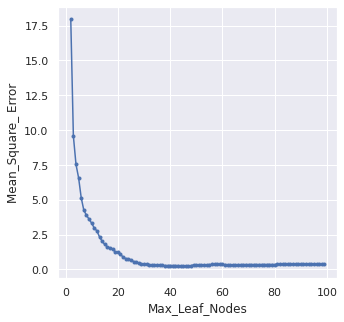

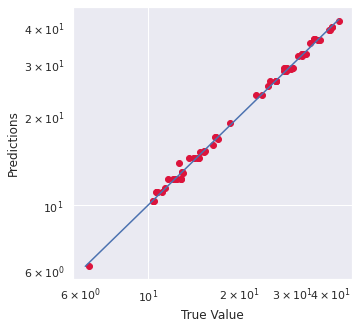

In [43]:
MaxLeafNodes = []
MSE = []
for i in range(2, 100):
    MaxLeafNodes.append(i)
    Regression_Tree = DecisionTreeRegressor(max_leaf_nodes=i)
    Regression_Tree.fit(X_train, Y_train)
    Predictions = Regression_Tree.predict(X_val)
    Mse = mse(Y_val, Predictions)
    MSE.append(Mse)

print(f"Minimum MSE is:{min(MSE)} when max_leaf_nodes are: {MSE.index(min(MSE))+2}")
print(MSE)
best_max_leaf_nodes = MSE.index(min(MSE))+2
plt.figure(figsize=(5,5))
plt.plot(MaxLeafNodes, MSE, marker = ".")
plt.xlabel("Max_Leaf_Nodes")
plt.ylabel("Mean_Square_ Error")

Regression_Tree = DecisionTreeRegressor(max_leaf_nodes=MSE.index(min(MSE))+2)
Regression_Tree.fit(X_train, Y_train)
Predictions = Regression_Tree.predict(X_val)
plt.figure(figsize=(5,5))
plt.scatter(Y_val, Predictions, c = 'crimson')
plt.yscale('log')
plt.xscale('log')
pmax = max(max(Predictions),max(Y_val))
pmin = min(min(Predictions),min(Y_val))
plt.plot([pmax,pmin], [pmax,pmin], 'b-')
plt.xlabel('True Value')
plt.ylabel('Predictions')
plt.show()

#####**3.** min_samples_split

Minimum MSE is:0.33076518759018697 when min_samples_split are: 4
[0.38449350649350644, 0.36666136363636326, 0.33076518759018697, 0.3742017766955267, 0.4061414902597404, 0.4069587644300144, 0.4079535848499575, 0.41098427676914917, 0.3880054427535807, 0.38561075107304815, 0.3871329826532412, 0.3667738366450545, 0.36107979804595125, 0.3533849936576812, 0.33179903280338324, 0.33294609600327085, 0.33294609600327113, 0.3329460960032716, 0.3560414363277667, 0.3557553292668523, 0.35575532926685277, 0.3557553292668519, 0.35834039817903585, 0.5210735822183672, 0.5210735822183676, 0.5810763665298837, 0.7110832448367614, 0.7840012251598125, 0.8657978857411422, 0.9550522749760568, 1.0561654953863862, 1.259480155626496, 1.2616999206209714, 1.261699920620971, 1.261699920620971, 1.2616999206209705, 1.26169992062097, 1.261699920620971, 1.277857133356953, 1.277857133356952, 1.2963335200121784, 1.3687707211988445, 1.3687707211988454, 1.6025819998888764, 1.6025819998888775, 1.602581999888876, 1.6025819998

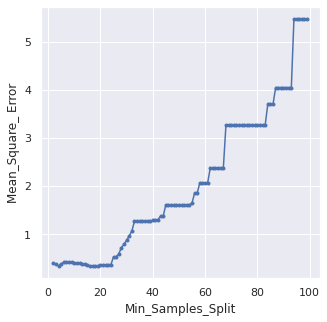

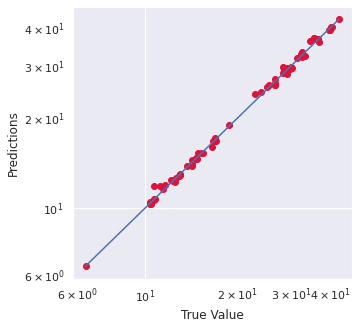

In [44]:
MinSamplesSplit = []
MSE = []
for i in range(2, 100):
    MinSamplesSplit.append(i)
    Regression_Tree = DecisionTreeRegressor(min_samples_split=i)
    Regression_Tree.fit(X_train, Y_train)
    Predictions = Regression_Tree.predict(X_val)
    Mse = mse(Y_val, Predictions)
    MSE.append(Mse)

print(f"Minimum MSE is:{min(MSE)} when min_samples_split are: {MSE.index(min(MSE))+2}")
print(MSE)
best_min_samples_split = MSE.index(min(MSE))+2
plt.figure(figsize=(5,5))
plt.plot(MinSamplesSplit, MSE, marker = ".")
plt.xlabel("Min_Samples_Split")
plt.ylabel("Mean_Square_ Error")

Regression_Tree = DecisionTreeRegressor(min_samples_split=MSE.index(min(MSE))+2)
Regression_Tree.fit(X_train, Y_train)
Predictions = Regression_Tree.predict(X_val)
plt.figure(figsize=(5,5))
plt.scatter(Y_val, Predictions, c = 'crimson')
plt.yscale('log')
plt.xscale('log')
pmax = max(max(Predictions),max(Y_val))
pmin = min(min(Predictions),min(Y_val))
plt.plot([pmax,pmin], [pmax,pmin], 'b-')
plt.xlabel('True Value')
plt.ylabel('Predictions')
plt.show()

#####**4.** min_samples_leaf

Minimum MSE is:0.3110200292207795 when min_samples_leaf are: 3
[0.38075921717171674, 0.3110200292207795, 0.33520422316643134, 0.5136704325468411, 0.5942727136130924, 0.5575938826314345, 0.553769252440587, 0.5542930337527918, 0.6840088304954928, 0.7835145716006255, 0.9448565673111684, 1.67722333093975, 1.7422905136733948, 1.7139965202476724, 1.9894058191851325, 2.2340720762958, 2.226178099739987, 2.226178099739988, 2.6364791935671814, 2.613337876338044, 2.4854238660912418, 2.4960221998748042, 2.4864319896370537, 2.9240939485936024, 2.924093948593602, 2.942337527726287, 3.4348395610780726, 3.470301229420904, 3.470301229420904, 4.028108579344189, 4.306496912107014, 5.891036908461702, 5.76146469739844, 5.761464697398437, 5.76146469739844, 5.871848454964092, 5.871848454964095, 5.871848454964092, 5.87184845496409, 5.871848454964092, 5.871848454964097, 5.871848454964094, 5.871848454964095, 5.8718484549640975, 5.871848454964091, 5.570329936856386, 5.570329936856388, 5.932041010056446, 5.932041

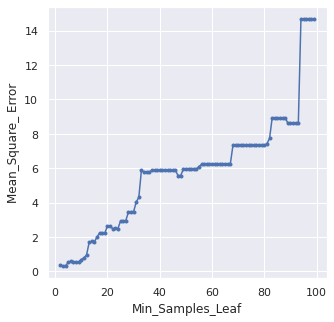

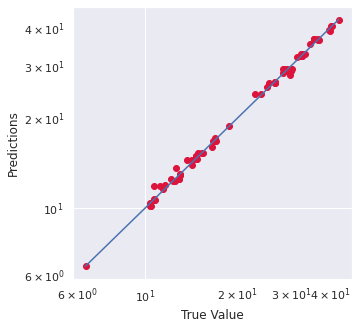

In [45]:
MinSamplesLeaf = []
MSE = []
for i in range(2, 100):
    MinSamplesLeaf.append(i)
    Regression_Tree = DecisionTreeRegressor(min_samples_leaf=i)
    Regression_Tree.fit(X_train, Y_train)
    Predictions = Regression_Tree.predict(X_val)
    Mse = mse(Y_val, Predictions)
    MSE.append(Mse)

print(f"Minimum MSE is:{min(MSE)} when min_samples_leaf are: {MSE.index(min(MSE))+2}")
print(MSE)
best_min_samples_leaf = MSE.index(min(MSE))+2
plt.figure(figsize=(5,5))
plt.plot(MinSamplesLeaf, MSE, marker = ".")
plt.xlabel("Min_Samples_Leaf")
plt.ylabel("Mean_Square_ Error")

Regression_Tree = DecisionTreeRegressor(min_samples_leaf=MSE.index(min(MSE))+2)
Regression_Tree.fit(X_train, Y_train)
Predictions = Regression_Tree.predict(X_val)
plt.figure(figsize=(5,5))
plt.scatter(Y_val, Predictions, c = 'crimson')
plt.yscale('log')
plt.xscale('log')
pmax = max(max(Predictions),max(Y_val))
pmin = min(min(Predictions),min(Y_val))
plt.plot([pmax,pmin], [pmax,pmin], 'b-')
plt.xlabel('True Value')
plt.ylabel('Predictions')
plt.show()

### **3.** Perform 5-fold cross-validation using the optimal hyper-parameters decided in the previous question. Finally, calculate the mean squared error between the predicted and the ground-truth values in the test data for your best model. Also, plot the decision tree created

In [46]:
X_traincombined = [X_train, X_val]
X_trainmerged = pd.concat(X_traincombined)
display(X_trainmerged)

,X1,X2,X3,X4,X5,X6,X7,X8
93,0.62,808.5,367.5,220.5,3.5,3,0.10,1
538,0.86,588.0,294.0,147.0,7.0,4,0.40,1
148,0.90,563.5,318.5,122.5,7.0,2,0.10,3
19,0.79,637.0,343.0,147.0,7.0,5,0.00,0
389,0.90,563.5,318.5,122.5,7.0,3,0.25,3
...,...,...,...,...,...,...,...,...
210,0.79,637.0,343.0,147.0,7.0,4,0.10,4
153,0.86,588.0,294.0,147.0,7.0,3,0.10,3
95,0.62,808.5,367.5,220.5,3.5,5,0.10,1
249,0.86,588.0,294.0,147.0,7.0,3,0.10,5


In [47]:
Y_traincombined = [Y_train, Y_val]
Y_trainmerged = pd.concat(Y_traincombined)
display(Y_trainmerged)

93     12.97
538    32.09
148    28.07
19     28.75
389    32.40
       ...  
210    35.45
153    26.47
95     13.02
249    26.45
717    16.90
Name: Y1, Length: 614, dtype: float64

In [51]:
model = tree.DecisionTreeRegressor(max_depth = best_max_depth, max_leaf_nodes = best_max_leaf_nodes, min_samples_split= best_min_samples_split, min_samples_leaf = best_min_samples_leaf)
kf = KFold(5)
results = cvs(model, X_trainmerged, Y_trainmerged, cv = kf)
print(results)
print(np.mean(results)*100)

[0.99702793 0.99694576 0.9914424  0.99230008 0.99668017]
99.48792669360917


Final MSE between the predicted and the ground-truth values in the test data for best model:  0.560897064325649


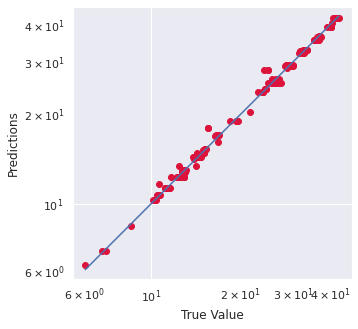

In [52]:
Regression_Tree = DecisionTreeRegressor(max_depth = best_max_depth, max_leaf_nodes = best_max_leaf_nodes, min_samples_split= best_min_samples_split, min_samples_leaf = best_min_samples_leaf)
Regression_Tree.fit(X_trainmerged, Y_trainmerged)
Predictions = Regression_Tree.predict(X_test)
MSE = mse(Y_test, Predictions)
print("Final MSE between the predicted and the ground-truth values in the test data for best model: ", MSE)
plt.figure(figsize=(5,5))
plt.scatter(Y_test, Predictions, c = 'crimson')
plt.yscale('log')
plt.xscale('log')
p1 = max(max(Predictions),max(Y_test))
p2 = min(min(Predictions),min(Y_test))
plt.plot([p1,p2], [p1,p2], 'b-')
plt.xlabel('True Value')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

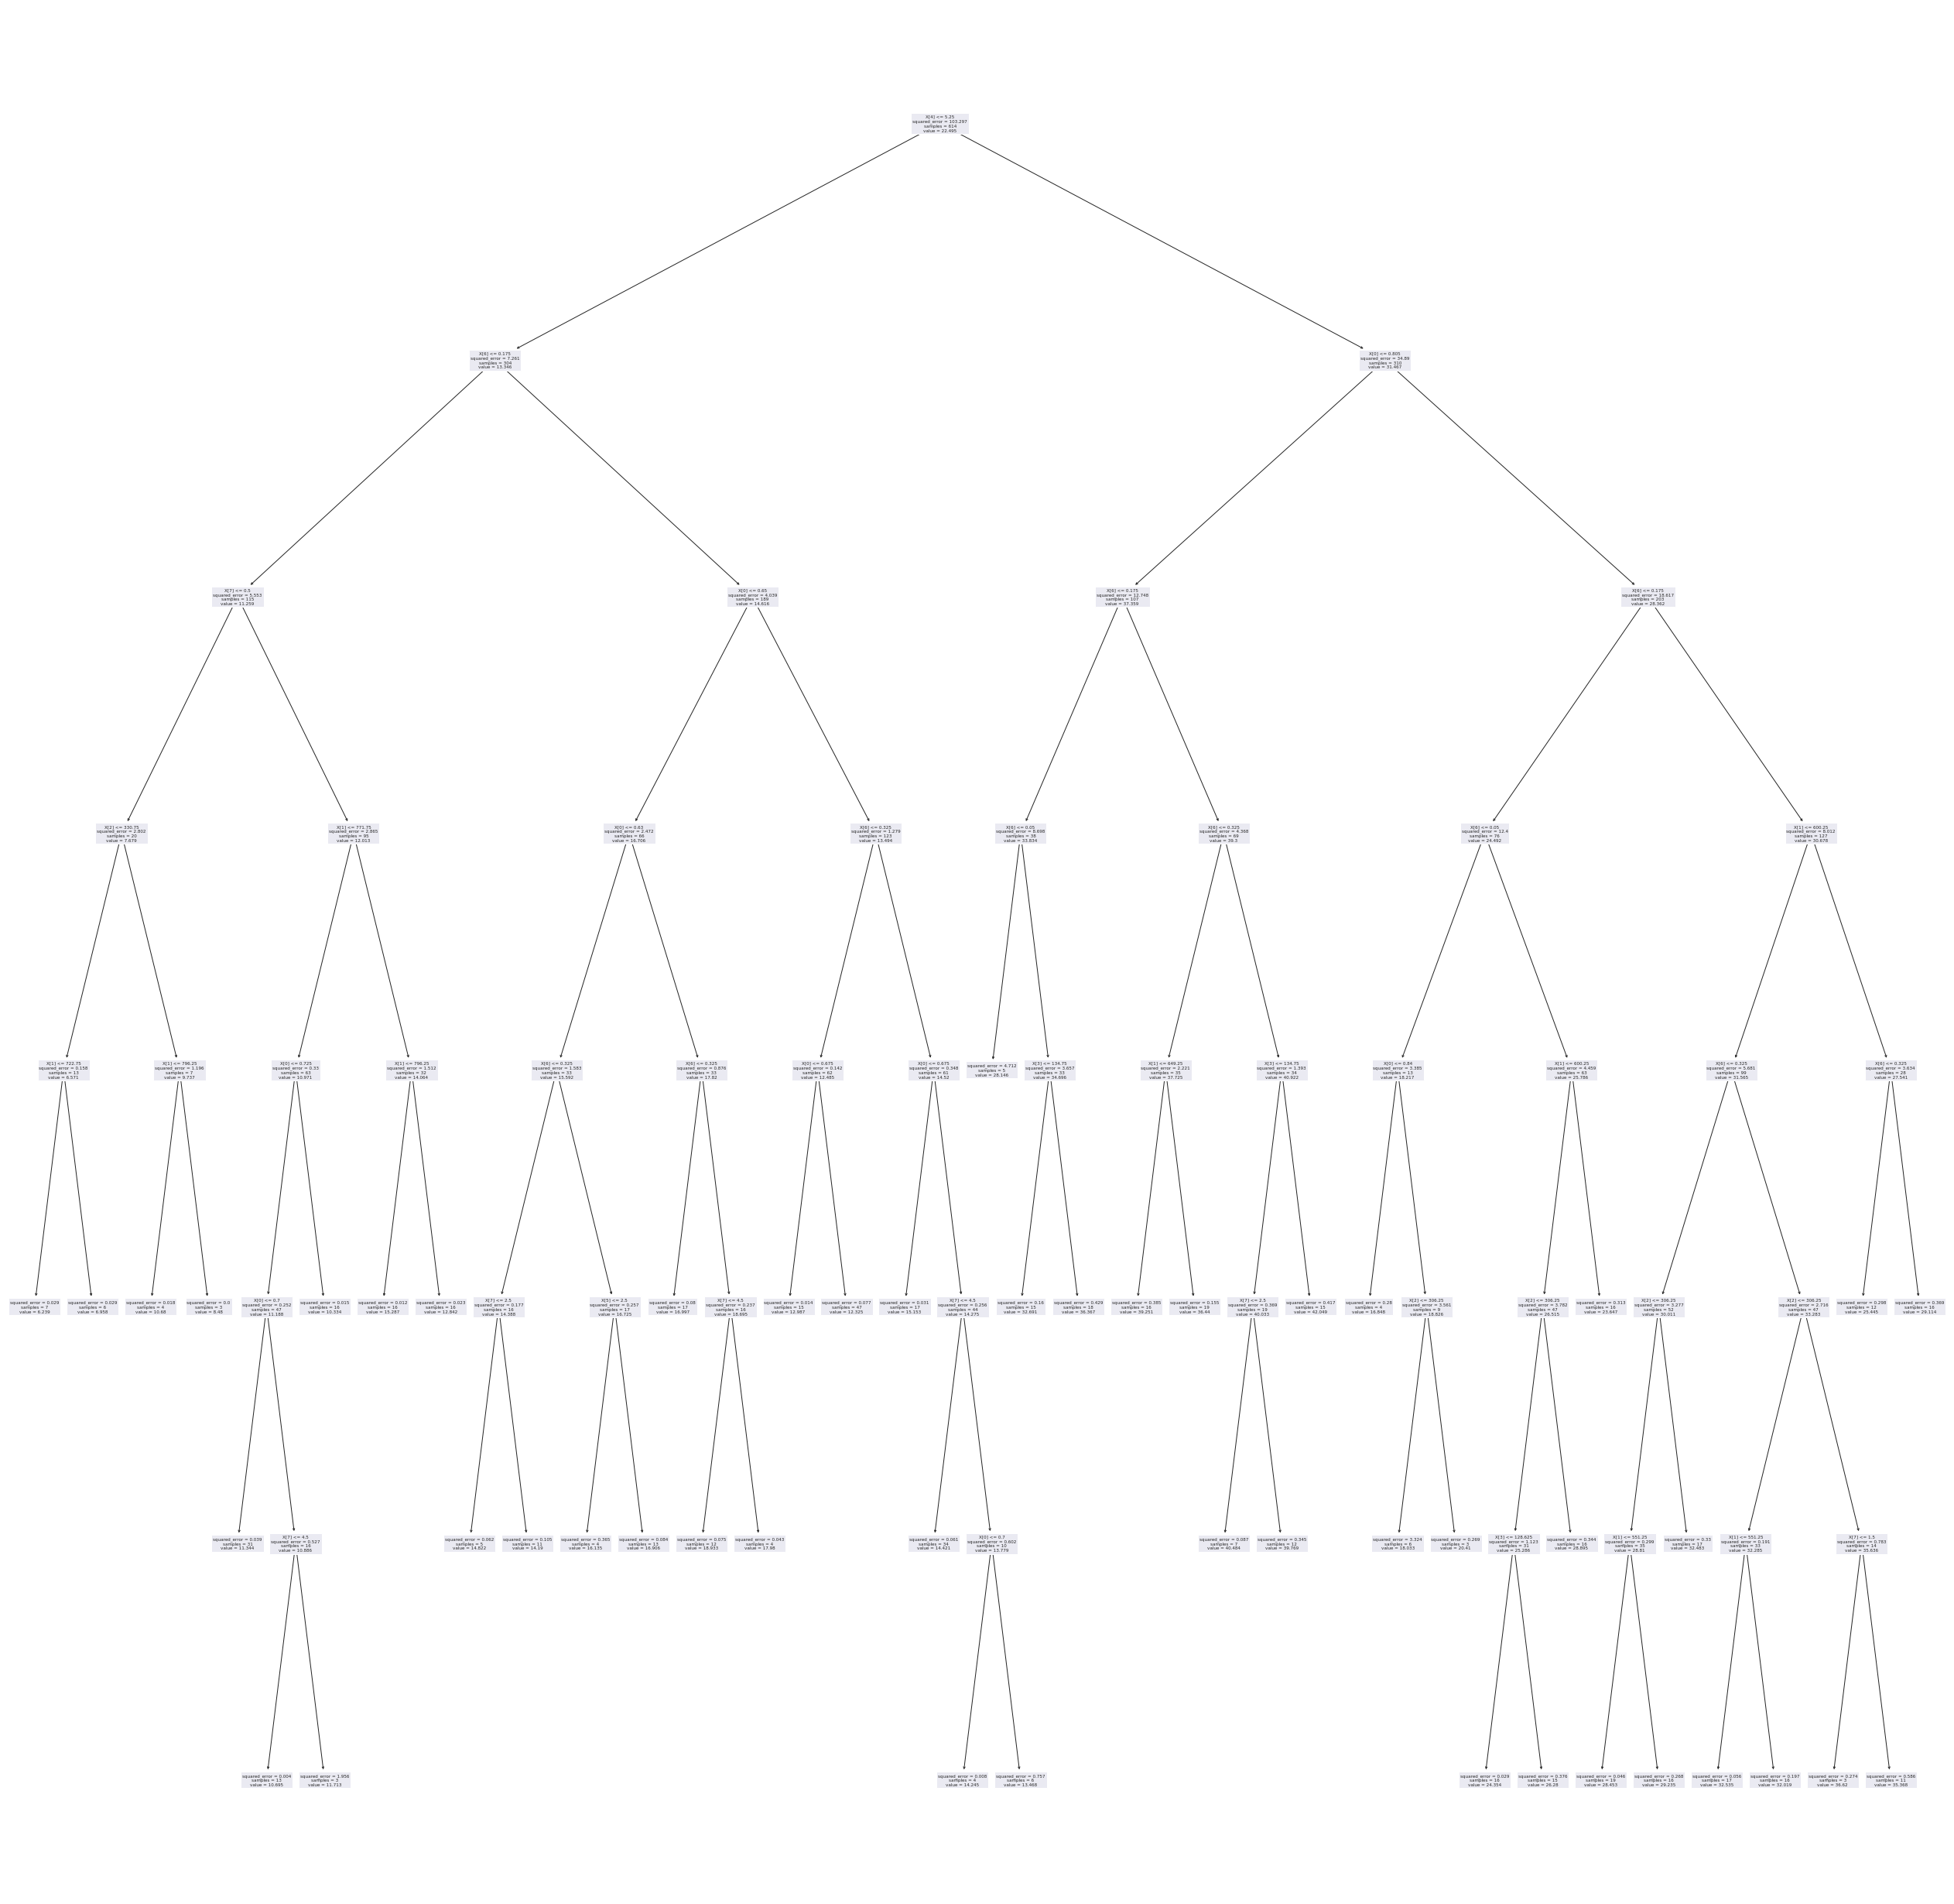

In [53]:
# Plot decision tree
plt.figure(figsize=(45,45))
tree.plot_tree(Regression_Tree)
plt.show()